<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/316_conjugate_families.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(sec-distr-coniugate)=
# Distribuzioni coniugate

L'obiettivo principale di questo capitolo è fornire un esempio dettagliato di come derivare la distribuzione a posteriori scegliendo una distribuzione a priori coniugata. In particolare, esploreremo un modello noto come schema beta-binomiale. Questo esempio illustrerà come le distribuzioni a priori coniugate possono semplificare il processo di inferenza bayesiana, consentendo di ottenere una distribuzione a posteriori in modo analitico.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# import seaborn as sns
import arviz as az
from scipy import stats

# from scipy import integrate

In [3]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

az.style.use("arviz-darkgrid")

## Derivazione analitica della distribuzione a posteriori

Le distribuzioni a priori coniugate costituiscono una classe speciale di distribuzioni di probabilità aventi una particolare caratteristica: se la distribuzione a priori appartiene a questa classe, anche la distribuzione a posteriori appartiene alla stessa classe, ovvero mantiene la stessa forma funzionale. Questo aspetto semplifica notevolmente l'aggiornamento delle nostre credenze riguardo al parametro di interesse, in quanto coinvolge semplicemente la modifica dei parametri della distribuzione a priori. Ad esempio, quando selezioniamo una distribuzione a priori Beta e la verosimiglianza corrisponde a una distribuzione binomiale, la distribuzione a posteriori sarà anch'essa una distribuzione Beta.

Nonostante le distribuzioni a priori coniugate siano la scelta preferibile dal punto di vista matematico, in quanto permettono di calcolare analiticamente la distribuzione a posteriori evitando calcoli complessi, le moderne tecniche di inferenza bayesiana offrono flessibilità nell'utilizzo di una vasta gamma di distribuzioni a priori. Questa flessibilità elimina la necessità di vincolarsi esclusivamente alle distribuzioni coniugate. Tuttavia, le distribuzioni a priori coniugate continuano a giocare un ruolo didattico rilevante, poiché presentano una soluzione analitica per il processo di aggiornamento bayesiano. Nel presene capitolo, esploreremo dettagliatamente il modello beta-binomiale, in cui la verosimiglianza binomiale si combina con la scelta di una distribuzione a priori Beta. Questo modello rappresenta la base dell'inferenza bayesiana su una proporzione.

## Lo schema beta-binomiale 

La distribuzione Beta è una funzione di probabilità che trova applicazione nella descrizione della variabilità di una variabile casuale limitata all'intervallo [0,1]. I suoi parametri, indicati come $\alpha$ e $\beta$, determinano la sua forma (si veda il capitolo {ref}`cont-rv-distr-notebook`). Questa distribuzione è particolarmente indicata per rappresentare le nostre convinzioni iniziali riguardo a una proporzione.

Una volta raccolti i dati e ottenuto un valore osservato per la proporzione, possiamo sfruttare l'approccio bayesiano per ottenere la distribuzione a posteriori. Questo processo comporta la combinazione della distribuzione a priori con la verosimiglianza, consentendoci di raffinare le nostre credenze sulla proporzione. 

Se optiamo per la distribuzione Beta come distribuzione a priori, la sua forma risulta essere:

$$
\theta^{\alpha - 1} (1 - \theta)^{\beta - 1}.
$$

In questo contesto, la normalizzazione non è rilevante poiché verrà applicata successivamente durante l'aggiornamento bayesiano.

Nel caso di una proporzione, la funzione di verosimiglianza è determinata dalla distribuzione binomiale:

$$
\theta^{y} (1 - \theta)^{n - y}.
$$

Anche in questo caso, il fattore di normalizzazione può essere tralasciato.

Per calcolare la distribuzione a posteriori, è necessario moltiplicare la funzione nucleo a priori, derivante dalla distribuzione Beta, con la funzione nucleo della verosimiglianza binomiale:

$$
\theta^{\alpha - 1} (1 - \theta)^{\beta - 1} \cdot \theta^{y} (1 - \theta)^{n - y} = \theta^{\alpha - 1 + y} (1 - \theta)^{\beta - 1 + n - y}.
$$

Il risultato ottenuto rappresenta la forma non normalizzata della distribuzione Beta con parametri $\alpha+y$ e $\beta+n-y$. In altre parole, quando osserviamo $y$ successi su $n$ prove di Bernoulli e selezioniamo una distribuzione a priori Beta con parametri $\alpha$ e $\beta$, l'aggiornamento bayesiano genera una distribuzione a posteriori Beta con parametri $\alpha+y$ e $\beta+n-y$.

L'esempio appena illustrato rappresenta un caso di analisi coniugata. In particolare, la combinazione della funzione di verosimiglianza binomiale con la distribuzione a priori Beta è noto come "caso coniugato beta-binomiale" ed è regolato dal seguente teorema.

```{admonition} Teorema
Supponiamo di avere una funzione di verosimiglianza $Bin(n, y \mid \theta)$ e una distribuzione a priori $Beta(\alpha, \beta)$. In questo caso, la distribuzione a posteriori del parametro $\theta$ sarà una distribuzione $Beta(\alpha + y, \beta + n - y)$. 
```

### Un esempio concreto

Per esemplificare concretamente il concetto di distribuzione coniugata beta-binomiale, esamineremo i dati provenienti dall'"Australian National Centre in HIV Epidemiology and Clinical Research", inclusi nel pacchetto R denominato MASS. All'interno del DataFrame chiamato "Aids2", sono raccolte informazioni sugli individui che sono stati diagnosticati con l'AIDS prima del primo luglio 1991. Complessivamente, sono stati registrati 2843 casi, tra cui, fino a quella data, 1082 erano ancora in vita mentre 1761 erano deceduti. L'obiettivo della nostra analisi è comprendere il tasso di mortalità.

Se consideriamo i casi come eventi indipendenti, i dati osservati ($y = 1082$) possono essere interpretati come una sequenza di variabili casuali di tipo Bernoulliano. Pertanto, la verosimiglianza assume una distribuzione binomiale. Nel caso in cui adottiamo una distribuzione a priori debolmente informativa di tipo Beta, con parametri $\alpha = 2$ e $\beta = 2$, la distribuzione a posteriori sarà una distribuzione Beta con parametri $2 + 1761$ e $2 + 2843 - 1761$, ovvero Beta(1763, 1084).

### La distribuzione a priori

La distribuzione Beta ci offre la possibilità di esprimere le nostre credenze iniziali riguardo a $\theta$, che rappresenta la probabilità di decesso. Ad esempio, scegliendo una distribuzione a priori $Beta(\alpha = 2, \beta = 2)$ per il parametro $\theta$, stiamo manifestando la nostra convinzione iniziale che, nel 1991, sussista un considerevole grado di incertezza in merito all'evento "sopravvivenza dopo la diagnosi dell'AIDS". In particolare, il valore 0.5 rappresenta il punto di $\theta$ più verosimile, ma allo stesso tempo gli altri valori del parametro (esclusi quelli agli estremi) sono considerati altrettanto plausibili.

Un sommario della distribuzione $Beta(alpha=2, beta=2)$ si ottiene usando la funzione seguente:

In [6]:
def summarize_beta(alpha, beta):
    """Summarize a Beta Model for \eqn{\pi}

    @param alpha,beta positive shape parameters of the Beta model

    Return Pandas Series with summary
    """

    mean = alpha / (alpha + beta)
    var = alpha * beta / ((alpha + beta) ** 2 * (alpha + beta + 1))
    sd = np.sqrt(var)

    if alpha < 1 and beta < 1:
        mode = "0 and 1"
    elif alpha <= 1 and beta > 1:
        mode = 0
    elif alpha > 1 and beta < 1:
        mode = 1
    else:
        mode = (alpha - 1) / (alpha + beta - 2)
    return pd.Series({"mean": mean, "mode": mode, "var": var, "sd": sd})

In [7]:
summarize_beta(alpha=2, beta=2)

mean    0.500000
mode    0.500000
var     0.050000
sd      0.223607
dtype: float64

Possiamo quantificare la nostra incertezza calcolando, con un grado di fiducia soggettiva del 94%, la regione nella quale, in base a tale credenza a priori, si trova il valore del parametro. Per ottenere tale intervallo di credibilità a priori, usiamo la funzione `beta.ppf` di `scipy.stats`. 

In [14]:
li = stats.beta.ppf(0.03, 2, 2)
ls = stats.beta.ppf(0.97, 2, 2)
list([li, ls])

[0.10364483924951279, 0.8963551607504872]

Se poniamo $\alpha=10$ e $\beta=10$, anche questa scelta descrive una credenza a priori per la quale il valore più credibile per $\theta$ è 0.5.

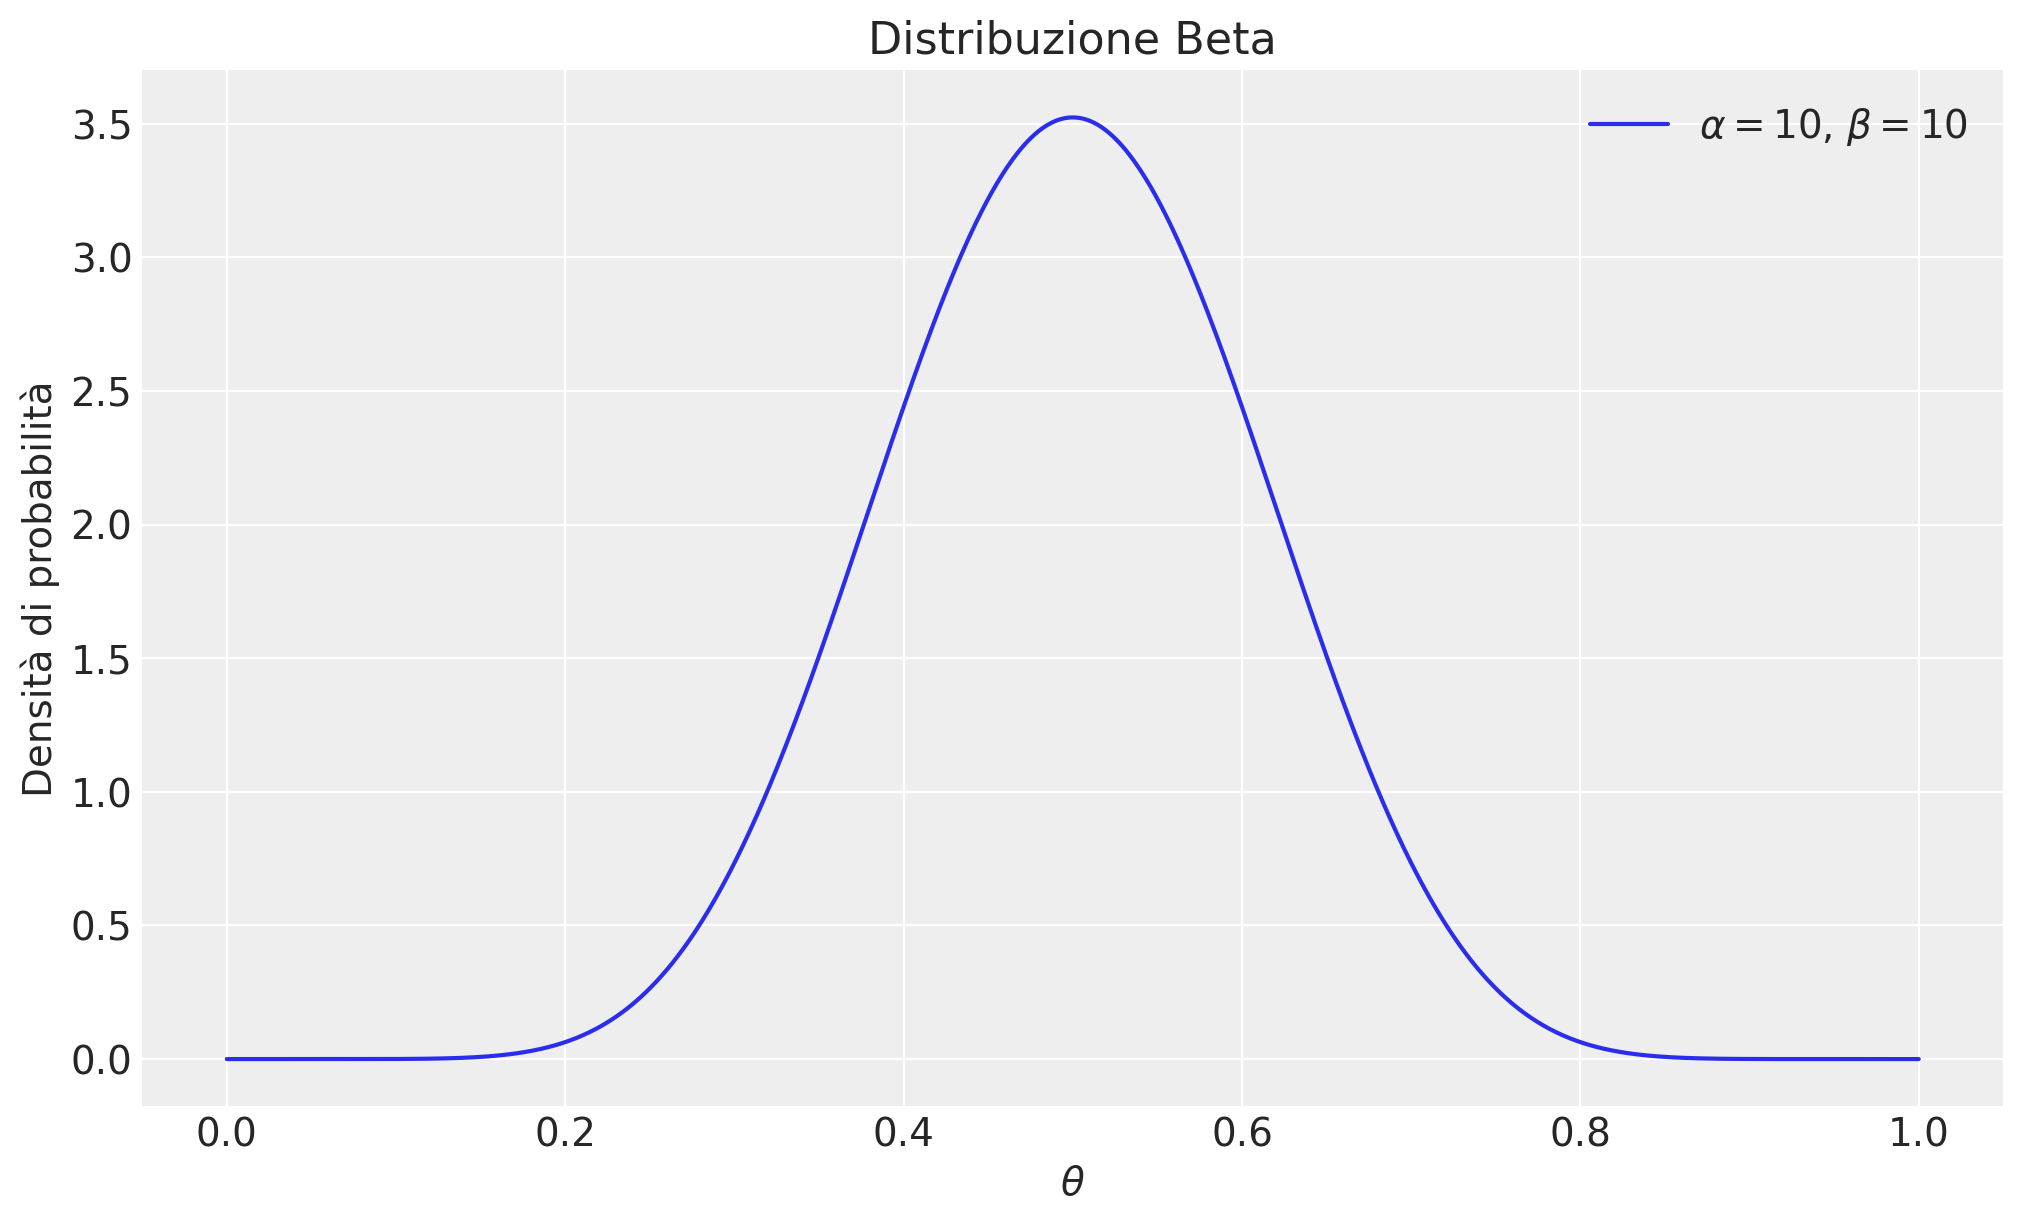

In [15]:
pdf_pre = stats.beta.pdf(theta, 10, 10)

plt.figure(figsize=(10, 6))
plt.plot(theta, pdf_pre, label=r'$\alpha=10$, $\beta=10$')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Densità di probabilità', fontsize=14)
plt.title('Distribuzione Beta', fontsize=16)
plt.legend()
plt.show()

Tuttavia, in questo caso la nostra incertezza a priori sul valore del parametro è minore, come indicato dall'intervallo di credibilità ordine 0.94.

In [16]:
li = stats.beta.ppf(0.03, 10, 10)
ls = stats.beta.ppf(0.97, 10, 10)
list([li, ls])

[0.2964110284916252, 0.7035889715083747]

Quale distribuzione a priori dovremmo scegliere? Nell'ambito di un problema pratico di analisi dati, la selezione della distribuzione a priori è influenzata dalle credenze iniziali che intendiamo incorporare nell'analisi. Se ci troviamo privi di informazioni a priori, è possibile optare per $\alpha=1$ e $\beta=1$, che corrisponde a una distribuzione a priori uniforme. Tuttavia, l'utilizzo di distribuzioni a priori uniformi è scoraggiato per diverse ragioni, tra cui l'instabilità numerica nella stima dei parametri. In tali contesti, è preferibile adottare una distribuzione a priori debolmente informativa, come ad esempio una $Beta(2, 2)$.

### La distribuzione a posteriori

Una volta scelta una distribuzione a priori $Beta(2, 2)$, i cui parametri rispecchiano le nostre credenze iniziali su $\theta$, la distribuzione a posteriori diventa una Beta di parametri $\alpha + y$ e $\beta + n - y$. Per i dati dell'esempio, otteniamo la distribuzione a posteriori $p(\theta \mid n, y) \sim Beta(1763, 1084)$.

Essendo $\mathbb{E}[Beta(\alpha, \beta)] = \frac{\alpha}{\alpha + \beta}$, il valore atteso a posteriori di $\theta$ può essere calcolato come:

$$
\mathbb{E}_{\text{post}} [\mathrm{Beta}(\alpha + y, \beta + n - y)] = \frac{\alpha + y}{\alpha + \beta +n}.
$$ (eq-ev-post-beta-bin-1)

Rappresentiamo qui sotto graficamente l'aggiornamento bayesiano beta-binomiale per i dati in esame nel caso di una distribuzione a priori $Beta(2, 2)$.

/var/folders/hl/dt523djx7_q7xjrthzjpdvc40000gn/T/ipykernel_35010/1783650344.py:19: RuntimeWarning: divide by zero encountered in log
  log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)


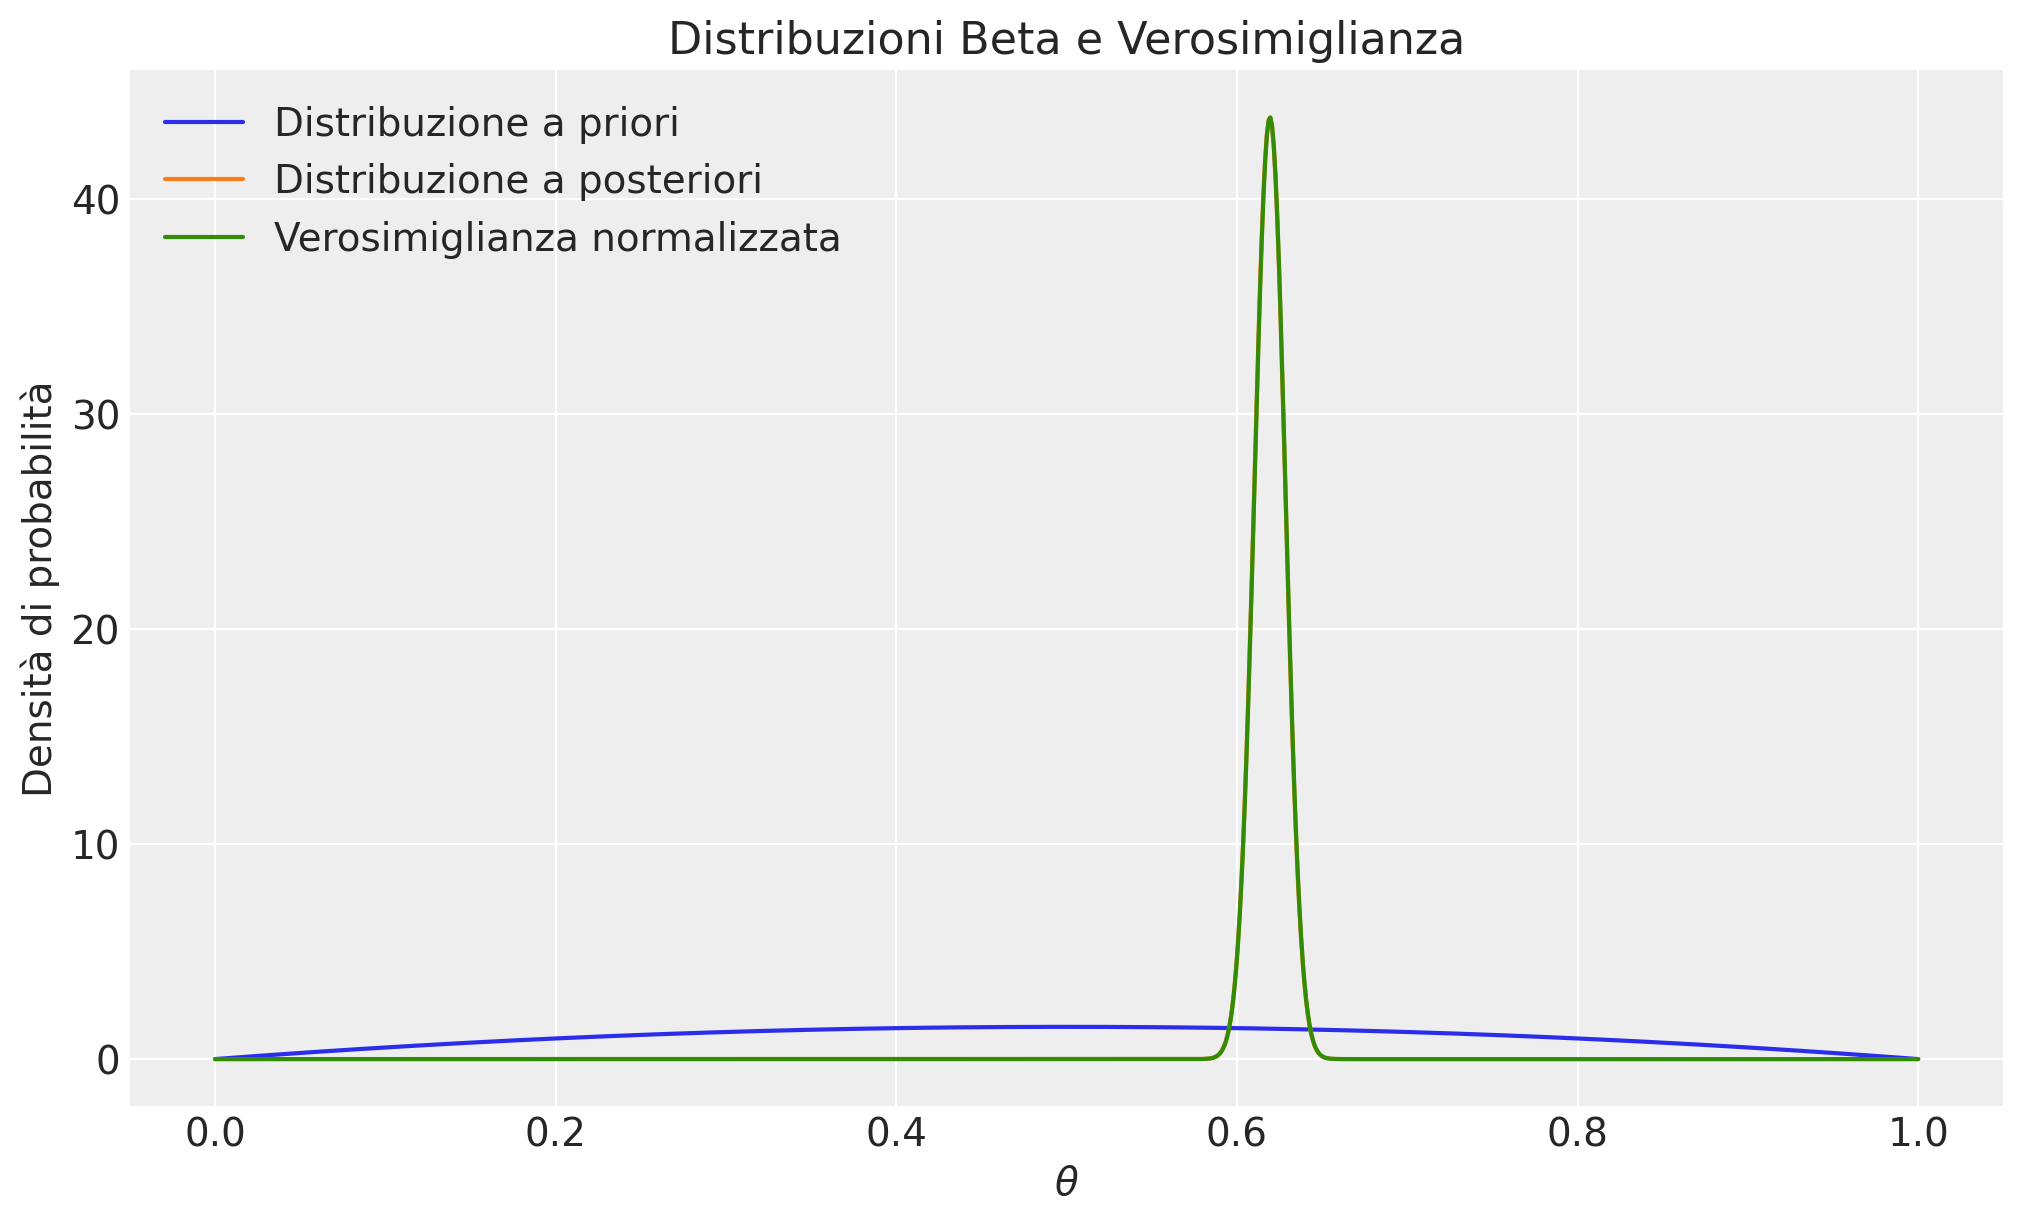

In [50]:
# Crea un array di valori di theta
theta = np.linspace(0, 1, 1000)

y = 1761
n = 2843

# Parametri delle distribuzioni beta
alpha_pre = 2
beta_pre = 2

alpha_post = alpha_pre + y
beta_post = beta_pre + n - y

# Calcola i valori delle distribuzioni beta
pdf_pre = stats.beta.pdf(theta, alpha_pre, beta_pre)
pdf_post = stats.beta.pdf(theta, alpha_post, beta_post)

# Calcola la log-verosimiglianza
log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)

# Scala la log-verosimiglianza per evitare valori molto piccoli
scaled_log_likelihood = log_likelihood - np.max(log_likelihood)

# Calcola la verosimiglianza normalizzata
normalized_likelihood = np.exp(scaled_log_likelihood)
normalized_likelihood /= np.trapz(normalized_likelihood, theta)

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.plot(theta, pdf_pre, label=r'Distribuzione a priori')
plt.plot(theta, pdf_post, label=r'Distribuzione a posteriori')
plt.plot(theta, normalized_likelihood, label=r'Verosimiglianza normalizzata')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Densità di probabilità', fontsize=14)
plt.title('Distribuzioni Beta e Verosimiglianza', fontsize=16)
plt.legend()


In questo caso, la distribuzione a priori è debolmente informativa, la verosimiglianza è molto forte, per cui la distribuzione a posteriori è praticamente sovrapposta alla verosimiglianza (normalizzata).

In [20]:
summarize_beta(1763, 1084)

mean    0.619248
mode    0.619332
var     0.000083
sd      0.009099
dtype: float64

In [22]:
li = stats.beta.ppf(0.03, 1763, 1084)
ls = stats.beta.ppf(0.97, 1763, 1084)
list([li, ls])

[0.6020654882558294, 0.6362894604661353]

Utilizzando il metodo della massima verosimiglianza, il tasso di mortalità stimato è $\theta = 1761/2843 = 0.62$, con un errore standard (SE) di $\sqrt{0.62(1−0.62)/n} = 0.0091$ e un intervallo di confidenza al 95% di [0.6, 0.63], che è simile all'intervallo ottenuto con l'inferenza bayesiana.

In [23]:
[.62 - stats.norm.ppf(0.97) * 0.0091, .62 + stats.norm.ppf(0.97) * 0.0091]

[0.6028847781658236, 0.6371152218341763]

Affinché la distribuzione a priori abbia un effetto sostanziale, è necessario che sia una distribuzione informativa e in disaccordo con i dati. Per esempio, una Beta(200, 5).

/var/folders/hl/dt523djx7_q7xjrthzjpdvc40000gn/T/ipykernel_35010/2082276027.py:19: RuntimeWarning: divide by zero encountered in log
  log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)


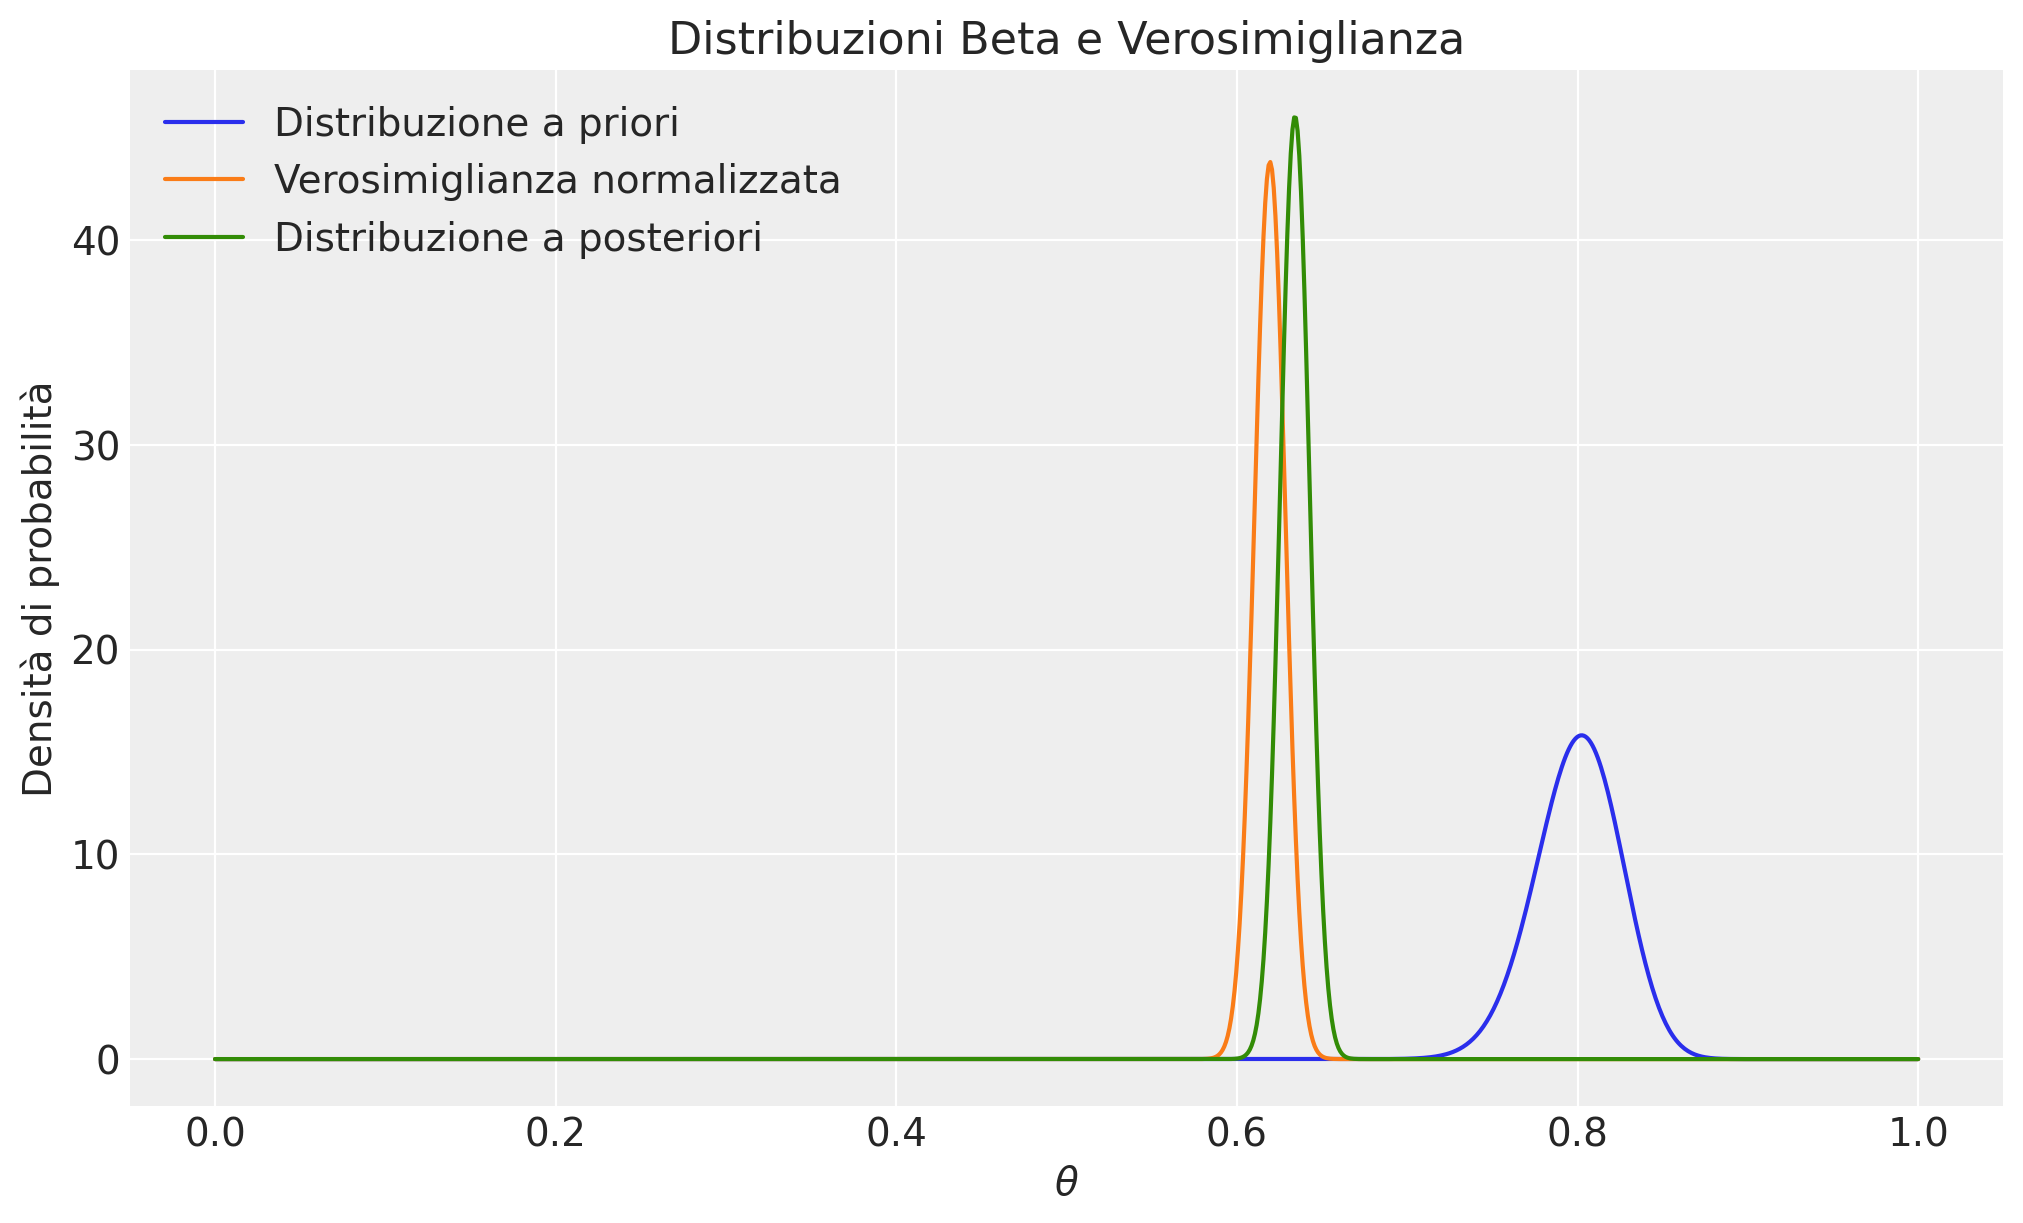

In [54]:
# Crea un array di valori di theta
theta = np.linspace(0, 1, 1000)

y = 1761
n = 2843

# Parametri delle distribuzioni beta
alpha_pre = 200
beta_pre = 50

alpha_post = alpha_pre + y
beta_post = beta_pre + n - y

# Calcola i valori delle distribuzioni beta
pdf_pre = stats.beta.pdf(theta, alpha_pre, beta_pre)
pdf_post = stats.beta.pdf(theta, alpha_post, beta_post)

# Calcola la log-verosimiglianza
log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)

# Scala la log-verosimiglianza per evitare valori molto piccoli
scaled_log_likelihood = log_likelihood - np.max(log_likelihood)

# Calcola la verosimiglianza normalizzata
normalized_likelihood = np.exp(scaled_log_likelihood)
normalized_likelihood /= np.trapz(normalized_likelihood, theta)

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.plot(theta, pdf_pre, label=r'Distribuzione a priori')
plt.plot(theta, normalized_likelihood, label=r'Verosimiglianza normalizzata')
plt.plot(theta, pdf_post, label=r'Distribuzione a posteriori')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Densità di probabilità', fontsize=14)
plt.title('Distribuzioni Beta e Verosimiglianza', fontsize=16)
plt.legend()

In [ ]:
li = stats.beta.ppf(0.03, 1763, 1084)
ls = stats.beta.ppf(0.97, 1763, 1084)
list([li, ls])

### La ricerca sull'obbedienza di Milgram

Consideriamo un altro esempio relativo alla ricerca di Stanley Milgram discussa da {cite:t}`Johnson2022bayesrules`. Nel 1963, Stanley Milgram presentò una ricerca sulla propensione delle persone a obbedire agli ordini di figure di autorità, anche quando tali ordini possono danneggiare altre persone {cite:t}`milgram1963behavioral`. Nell'articolo, Milgram descrive lo studio come

> consist\[ing\] of ordering a naive subject to administer electric shock to a victim. A simulated shock generator is used, with 30 clearly marked voltage levels that range from IS to 450 volts. The instrument bears verbal designations that range from Slight Shock to Danger: Severe Shock. The responses of the victim, who is a trained confederate of the experimenter, are standardized. The orders to administer shocks are given to the naive subject in the context of a "learning experiment" ostensibly set up to study the effects of punishment on memory. As the experiment proceeds the naive subject is commanded to administer increasingly more intense shocks to the victim, even to the point of reaching the level marked Danger: Severe Shock.

All'insaputa del partecipante, gli shock elettrici erano falsi e l'attore stava solo fingendo di provare il dolore dello shock.

{cite:t}`Johnson2022bayesrules` fanno inferenza sui risultati dello studio di Milgram mediante il modello Beta-Binomiale. Il parametro di interesse è la probabilità $\theta$ che una persona obbedisca all'autorità, anche se ciò comporta il rischio di recare danno ad altri, in questo caso somministrando lo shock più severo. Gli autori ipotizzano che, prima di raccogliere dati, le credenze di Milgram riguardo a $\theta$ possano essere rappresentate mediante una distribuzione Beta con parametri $\alpha=1$ e $\beta=10$.

Sia $y = 26$ il numero di soggetti, su un totale di 40 partecipanti, che hanno accettato di infliggere lo shock più severo. Poiché si assume che ciascun partecipante si comporti in modo indipendente dagli altri, la dipendenza di $y$ da $\theta$ può essere modellata mediante la distribuzione binomiale. Di conseguenza, si giunge al seguente modello bayesiano Beta-Binomiale:

$$
\begin{align}
y \mid \theta & \sim \text{Bin}(n = 40, \theta) \notag\\
\theta & \sim \text{Beta}(1, 10) \; . \notag
\end{align}
$$

Il processo di aggiornamento bayesiano è descritto dalla figura ottenuta con la funzione `plot_beta_binomial()`.

/var/folders/hl/dt523djx7_q7xjrthzjpdvc40000gn/T/ipykernel_35010/2664241178.py:19: RuntimeWarning: divide by zero encountered in log
  log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)


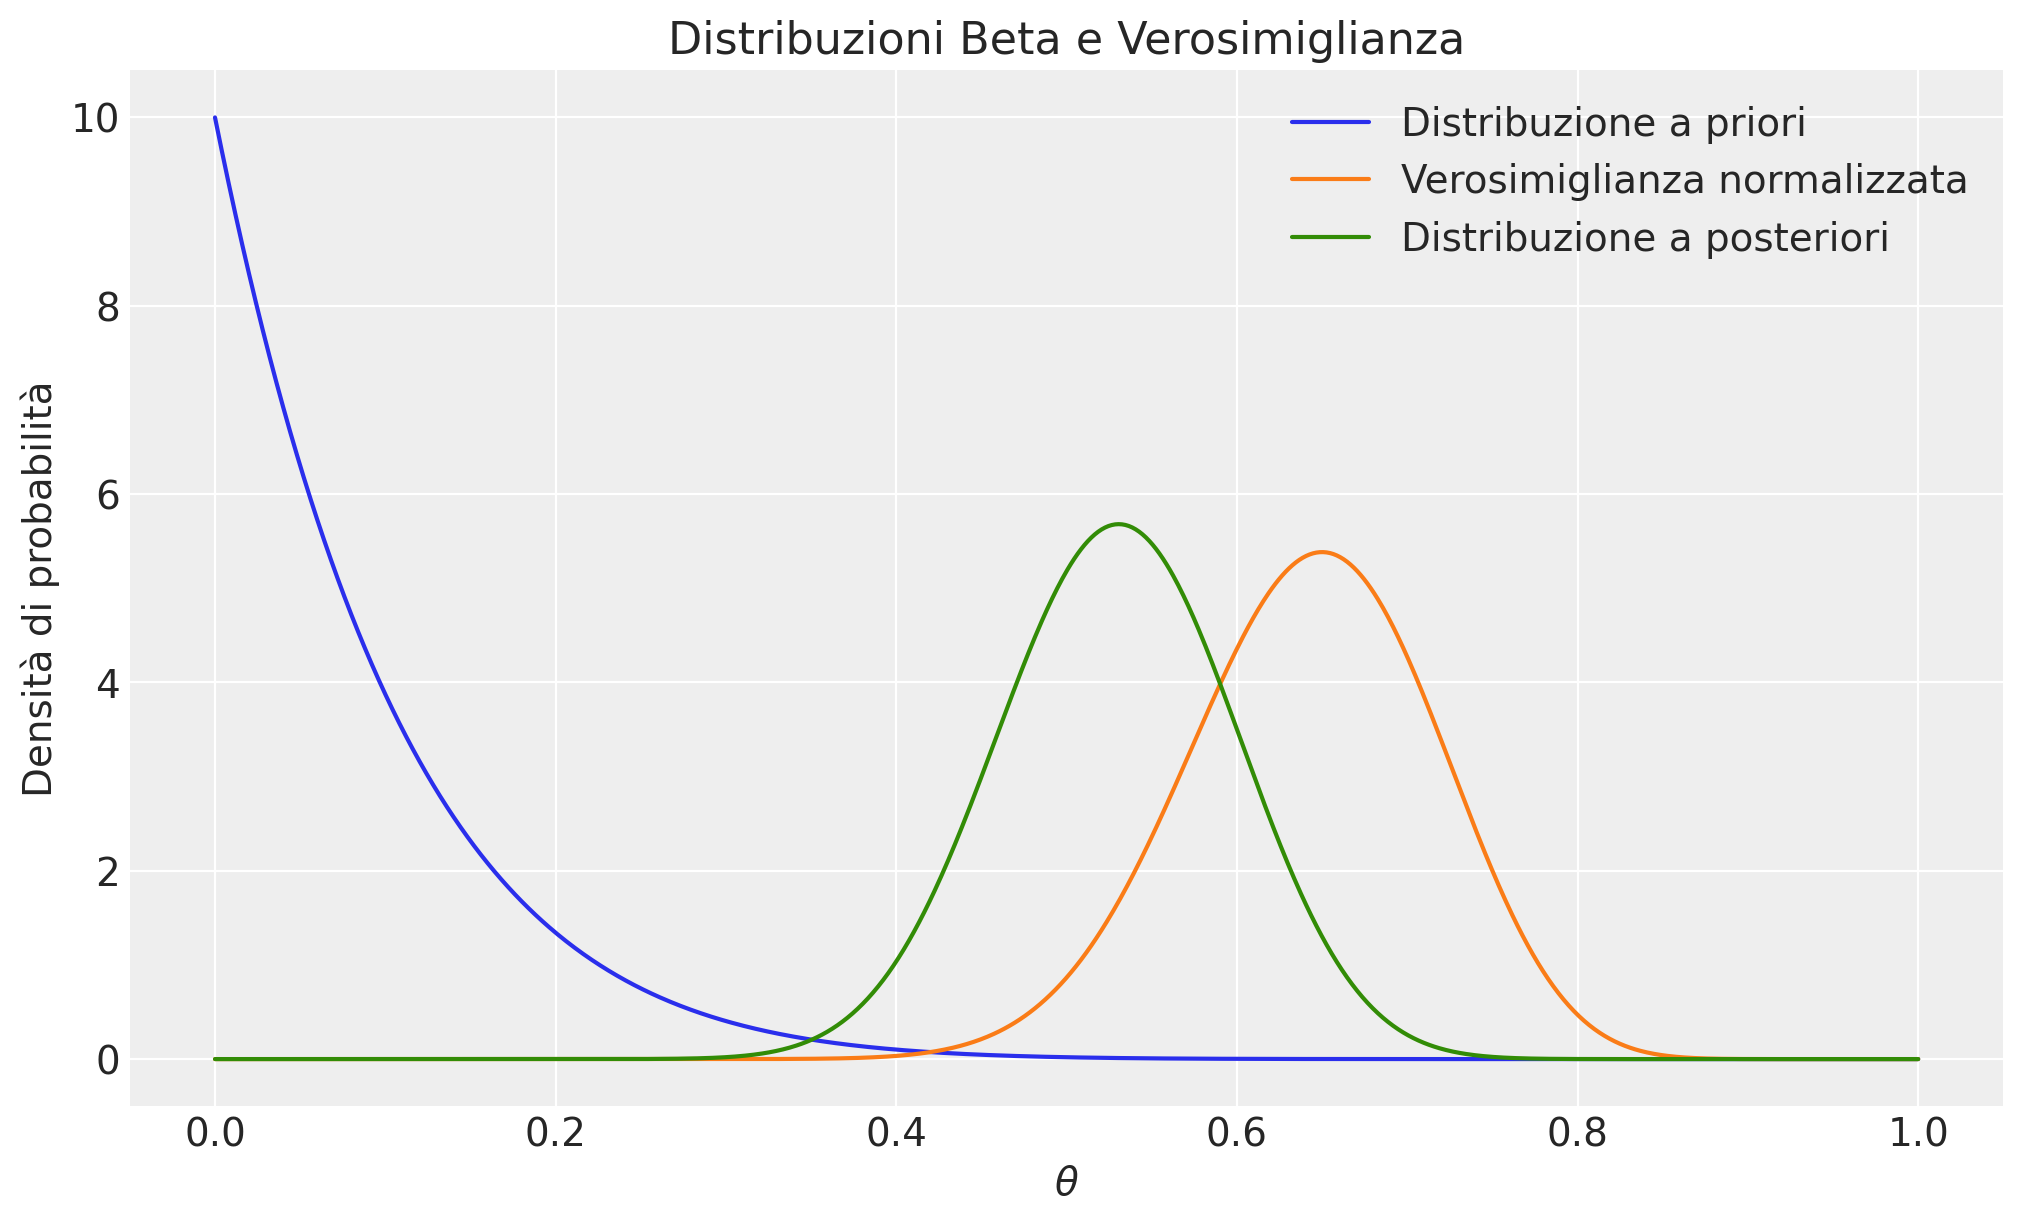

In [55]:
# Crea un array di valori di theta
theta = np.linspace(0, 1, 1000)

y = 26
n = 40

# Parametri delle distribuzioni beta
alpha_pre = 1
beta_pre = 10

alpha_post = alpha_pre + y
beta_post = beta_pre + n - y

# Calcola i valori delle distribuzioni beta
pdf_pre = stats.beta.pdf(theta, alpha_pre, beta_pre)
pdf_post = stats.beta.pdf(theta, alpha_post, beta_post)

# Calcola la log-verosimiglianza
log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)

# Scala la log-verosimiglianza per evitare valori molto piccoli
scaled_log_likelihood = log_likelihood - np.max(log_likelihood)

# Calcola la verosimiglianza normalizzata
normalized_likelihood = np.exp(scaled_log_likelihood)
normalized_likelihood /= np.trapz(normalized_likelihood, theta)

# Crea il grafico
plt.figure(figsize=(10, 6))
plt.plot(theta, pdf_pre, label=r'Distribuzione a priori')
plt.plot(theta, normalized_likelihood, label=r'Verosimiglianza normalizzata')
plt.plot(theta, pdf_post, label=r'Distribuzione a posteriori')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Densità di probabilità', fontsize=14)
plt.title('Distribuzioni Beta e Verosimiglianza', fontsize=16)
plt.legend()

In [57]:
li = stats.beta.ppf(0.03, 1 + 26, 10 + 40 - 26)
ls = stats.beta.ppf(0.97, 1 + 26, 10 + 40 - 26)
list([li, ls])

[0.3986201110959706, 0.6582462555099745]

Pertanto, possiamo giungere a una conclusione soggettiva con un livello di probabilità del 94% che una proporzione di soggetti compresa tra il 40% e il 66% seguirà le istruzioni di un'autorità, nonostante queste istruzioni comportino evidenti danni ai propri compagni.

## Principali distribuzioni coniugate

Esistono altre combinazioni di verosimiglianza e distribuzione a priori che producono una distribuzione a posteriori con la stessa forma della distribuzione a priori. Ecco alcune delle più note coniugazioni tra modelli statistici e distribuzioni a priori:

- Nel modello Normale-Normale $\mathcal{N}(\mu, \sigma^2_0)$, la distribuzione a priori è $\mathcal{N}(\mu_0, \tau^2)$ e la distribuzione a posteriori è $\mathcal{N}\left(\frac{\mu_0\sigma^2 + \bar{y}n\tau^2}{\sigma^2 + n\tau^2}, \frac{\sigma^2\tau^2}{\sigma^2 + n\tau^2} \right)$.

- Nel modello Poisson-gamma $\text{Po}(\theta)$, la distribuzione a priori è $\Gamma(\lambda, \delta)$ e la distribuzione a posteriori è $\Gamma(\lambda + n \bar{y}, \delta +n)$.

- Nel modello esponenziale $\text{Exp}(\theta)$, la distribuzione a priori è $\Gamma(\lambda, \delta)$ e la distribuzione a posteriori è $\Gamma(\lambda + n, \delta +n\bar{y})$.

- Nel modello uniforme-Pareto $\text{U}(0, \theta)$, la distribuzione a priori è $\text{Pa}(\alpha, \varepsilon)$ e la distribuzione a posteriori è $\text{Pa}(\alpha + n, \max(y_{(n)}, \varepsilon))$.

## Critiche dei modelli con famiglie coniugate

Prima di concludere il capitolo, è importante riconoscere che i modelli basati sul concetto di famiglie coniugate presentano anche delle limitazioni. In particolare, un modello con una distribuzione a priori coniugata potrebbe non essere sempre sufficientemente flessibile per adattarsi alle nostre credenze iniziali (prima di avere osservato i dati). Ad esempio, un modello normale è sempre unimodale e simmetrico rispetto alla media $\mu$. Tuttavia, se la nostra comprensione preliminare non è simmetrica o non è unimodale, la distribuzione a priori normale potrebbe non essere la scelta più appropriata [@Johnson2022bayesrules].

## Commenti e considerazioni finali 

Nel capitolo, abbiamo appreso come unire le conoscenze a priori e le evidenze dai dati per ottenere una stima della distribuzione di probabilità a posteriori del parametro $\theta$, che rappresenta l'incertezza su un parametro di interesse. Quando $\theta$ rappresenta la probabilità di successo in una sequenza di prove Bernoulliane, abbiamo utilizzato una distribuzione a priori Beta per esprimere le nostre credenze iniziali su $\theta$. Grazie alla funzione di verosimiglianza binomiale, abbiamo potuto applicare il teorema di Bayes e ottenere la distribuzione a posteriori, anch'essa una distribuzione Beta. Questo metodo di inferenza statistica è noto come schema "beta-binomiale" e ci permette di calcolare analiticamente i parametri della distribuzione a posteriori utilizzando una distribuzione a priori coniugata. In questo modo, otteniamo una stima più precisa dell'incertezza sul parametro $\theta$, basata sia sulle nostre conoscenze a priori che sui dati osservati.

## Watermark

In [58]:
%watermark -n -u -v -iv

Last updated: Sun Aug 06 2023

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

arviz     : 0.16.1
numpy     : 1.25.2
pandas    : 2.0.3
matplotlib: 3.7.1
scipy     : 1.11.1

